# Mapeo de Hénon

- Hénon propuso, en 1976, un mapeo en 2D sencillo que exhibiera las propiedades esenciales del sistema de ecuaciones de primer orden acopladas propuestas por Lorentz, con el objetivo de poder estudiar de forma sencilla dichas propiedades.

- El mapeo imita una sección de Poincaré del atractor de Lorentz.

- El mapeo propuesto es el siguiente 

\begin{equation}
\begin{split}
    T:\,&x_{i+1}=y_{i+1}-ax_{i}^{2}\\
    &y_{i+1}=bx_{i}
\end{split}
\end{equation}





- Dicho mapeo se puede descomponer en tres etapas, i.e., $T\,=\,T'''T''T$. Si se toma como condición inicial una elipse:


![](doblamiento_T1.png)

- La primera etapa consiste en un doblamiento:

\begin{equation}
\begin{split}
    T':\,&x'=x\\
    &y'=y+1-ax^{2}
\end{split}
\end{equation}

![](doblamiento_T2.png)

- La segunda etapa consiste en una contracción en $x$:

\begin{equation}
\begin{split}
    T'':\,&x''=bx'\\
    &y''=y
\end{split}
\end{equation}


![](doblamiento_T3.png)

- La tercera etapa consiste en un reorientación en el eje x:

\begin{equation}
\begin{split}
    T''':\,&x'''=y''\\
    &y'''=x''
\end{split}
\end{equation}

![](doblamiento_T4.png)

- Es un mapeo con Jacobiano constante:

\begin{equation}
    \frac{\partial (x_{i+1},y_{i+1})}{\partial (x_{i},y_{i})}=-b
\end{equation}



- Tiene dos puntos invariantes

\begin{equation}
\begin{split}
    &x=\frac{-(1-b)\pm\sqrt{(1-b)^{2}+4a}}{2a}\\
    &y=bx
\end{split}
\end{equation}



- Dichos puntos son reales para 
\begin{equation}
a>a_{0}=-\frac{1}{4}(1-b)^{2}.
\end{equation}


En este caso, un punto es siempre linealmente inestable, mientras que el otro es inestable para 

\begin{equation}
a>a_{1}=\frac{3}{4}(1-b)^{2}.
\end{equation}

In [15]:
using Plots, LaTeXStrings
pyplot(markerstrokecolor=false)

Plots.PyPlotBackend()

In [12]:
function Henon(x, y, a, b)
    
    1 - a*x^2 + y , b*x
    
end 

Henon (generic function with 1 method)

# Áreas

Para determinar para cuales constantes el mapeo es conservativo y disipativo, se implentó un algoritmo, que usa el método de Monte Carlo para medir áreas de una figura, en este caso la figura consiste de un círculo unitario que está dado por la parametrización:

$$ \sigma(t) = (cos t, sin t), \qquad t \in [0, 2 \pi].$$

Para medir el área de la figura después de iterarlo una vez con el mapeo de Hénon, se hace la compoción del mapeo de con la parametrización, por ejemplo, para la primera iteración se tiene:

$$H \circ \sigma = (1 - acos^2t + y , \ bsint),$$

de esta forma se parametriza la figura que resulta de iterar una vez el círculo unitario con el mapeo de Hénon. Si se vuelve a iterar lo anterior con el mapeo de Hénon, se obtine la parametrización de la figura que resulta de iterar dos veces el círculo unitario. Así se puede obtener figuras cerradas a las que se les puede medir el área. 

El método con el que se midieron las áreas consiste en los siguientes pasos:
- Poner la figura en un cuadrado que la contenga totalmente. El área del cuadrado se puede calcular fácilmente.
- Arrojar un número $N$ de puntos en el cuadrado.
- Contar la cantidad de puntos que caen dentro de la figura.
- El área de la figura va a estar dada por la siguiente relación:

$$A_{figura} = A_{cuadrado}\frac{a_{in}}{N},$$

    donde $a_in$ es el número de puntos que cae dentro de la figura, y $N$ es el total de puntos.

Se usó el método ["Inside Outside"](http://commons.bcit.ca/math/entertainment/inout/index.html), implementado en la función `in_or_out`, para determinar si un punto está dentro o fuera de una figua irregular. A continuación se declaran las funciones ocupadas para medir el área.

In [1]:
"""
    in_or_out(para, x, y)

Función que evalúa si un punto dado por `x` y `y` está dentro de una figura dada por una parametrización
en forma de un array `para` creado usando la función `condiones_iniciales_2D`.

"""

function in_or_out(para, x, y)
    
    crossings = 0
    
    for i in 1:length(para[1,:])-1
        
        if x < para[1, i] && x < para[1, i+1] || x > para[1, i] && x > para[1, i+1]
            
            nothing
            
        elseif y > para[2,i] && y > para[2, i+1]
            
            nothing
    
        elseif y < para[2,i] && y < para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1] || x > para[1, i] && x < para[1, i+1]
                
                crossings += 1
                
            end
            
        elseif y > para[2, i] && y < para[2, i+1]
            
            if x > para[1, i] && x < para[1, i+1]
                
                y_c = para[2,i] + (para[2, i+1] - para[2, i])*(x - para[1, i])/(para[1, i+1] - para[1, i])
                
                if y_c > y
                    
                    crossings += 1
                    
                end
                
            end
            
        elseif y < para[2, i] && y > para[2, i+1]
            
            if x < para[1, i] && x > para[1, i+1]
                
                y_c = para[2, i+1] + (para[2, i] - para[2, i+1])*(x - para[1, i+1])/(para[1, i] - para[1, i+1])

                if y_c > y

                    crossings += 1

                end

            end
            
        end
        
    end
    
    if iseven(crossings)
        
        return false
        
    elseif isodd(crossings)
        
        return true
        
    end
    
end

in_or_out

In [7]:
"""
    condiones_iniciales_2D(f::Function, t_range, a, b)

Función que guarda en un array de de 2×n una parametrización `f` para un rango `t_range`.
Los parámetros `a` y `b` sirven para parametrizaciones que requieran del mapeo de Hénon.

"""

function condiones_iniciales_2D(f::Function, t_range, a, b)
    CI = zeros(2, length(t_range))
    
    for i in 1:length(t_range)
        
        CI[1, i] = f(t_range[i], a, b)[1]
        CI[2, i] = f(t_range[i], a, b)[2]
        
    end
    
    CI
    
end

condiones_iniciales_2D

In [8]:
"""
    iterator(f::Function, X0, a, b, N)

Itera un array `X0` usando un mapeo `f`, un número `N` de veces. `a` y `b` son parámetros del mapeo
Hénon.

"""


function iterator(f::Function, X0, a, b, N)
    
    aux = copy(X0)
    orbit = zeros(size(aux))
    
    for j in 1:N
        
        for i in 1:length(aux[1, :])

            orbit[1, i] = f(aux[1, i], aux[2, i], a, b)[1]
            orbit[2, i] = f(aux[1, i], aux[2, i], a, b)[2]

        end
        
        aux = copy(orbit)
 
    end
    
    orbit
    
end 

iterator

In [2]:
"""
    invert_ceil(x)

Es una función que redondea hacia arriba un número positivo `x`, o si el número es negativo, lo redondea
hacia abajo.
"""

function invert_ceil(x)
    
    if x < 0 
        
        x = -ceil(abs(x))
        
    else
        
        x = ceil(x)
        
    end
    
    x
    
end

invert_ceil

In [6]:
"""
    randinterval(n, min, max)

La función da un arreglo con `n` números que son aleatorios en un intervalo definido por `min` y `max`.
"""

function randinterval(n, min, max)
    
    rand(n) * (max - min) + min
    
end

randinterval

In [3]:
"""
    enclosing_square(Param_array)

Es una función que dada una parametrización en forma de array `Param_array` que define una figura, 
calcula las coordenadas de un cuadrado que encierra completamente a esa figura.

"""

function enclosing_square(Param_array)
    
    x_min = invert_ceil(min(Param_array[1,:]...))
    x_max = invert_ceil(max(Param_array[1,:]...))
    y_min = invert_ceil(min(Param_array[2,:]...) )
    y_max = invert_ceil(max(Param_array[2,:]...))
    
    return (x_min, x_max), (y_min, y_max)
    
end

enclosing_square

In [4]:
"""
    itera_parametrizacion_henon(n)

Es una función que declara funciones anónimas que son la composición de la parametrización del círculo
unitario con el mapeo de Hénon. El parámetro `n` es el número de composiciones con el mapeo de Hénon.

"""

function itera_parametrizacion_henon(n)
    
    #1 - a*x^2 + y , b*x
    
    x = "cos(t)"
    y = "sin(t)"

    for i in 1:n

        xi = "1 - a*($x)^2 + ($y)"
        yi = "b*($x)"
        x = xi
        y = yi

    end

    ex = parse(x*" , "*y)
    ex_ret = :( (t, a, b) -> $ex )
    eval(ex_ret)
end  

itera_parametrizacion_henon

In [5]:
itera_parametrizacion_henon(3)(0, 1.4, 0.3)

(-0.7408864000000001,0.32280000000000003)

In [20]:
"""
    find_area(Σ::Function, t_range, N, a, b)

Función que calcula el área de una figura dada por una parametrización Σ, usando el método de 
Monte Carlo para calcular áreas. El rango `t_range`es el rango donde está definida la 
parametrizacion Σ, `N` es el número de puntos que se van a arrrojar para medir el área y los 
parámetros `a` y `b` son para las parametrizaciones de figuras que surgen de iterar el mapeo 
de Hénon. Para que funcione Σ debe tomar por argumentos Σ(t, a, b), aunque a y b no se 
requieran para la parametrización.


"""
function find_area(Σ::Function, t_range, N, a, b)
    
    parametrization = condiones_iniciales_2D(Σ, t_range, a, b)
    x_limites, y_limites = enclosing_square(parametrization)
    inside = 0
    total = N
    area = (x_limites[end] - x_limites[1]) * (y_limites[end] - y_limites[1])
    
    for i in 1:N
        
        x = randinterval(1, x_limites[1], x_limites[end])[1]
        y = randinterval(1, y_limites[1], y_limites[end])[1]
        
        if in_or_out(parametrization, x, y)
            
            inside += 1
            
        end
    end

    area * inside / total
    
end

find_area

In [24]:
t_rango = 0:0.01:2π

0.0:0.01:6.28

In [25]:
σ(t, a, b) = (cos(t), sin(t)) #parametrización del círculo.

σ (generic function with 1 method)

In [28]:
@time find_area(σ, t_rango, 1000000, 1.4, -1) #Área del círculo con 1 millon de puntos, param. 1.4 y -1 son irrelevantes

  5.879960 seconds (8.01 M allocations: 5.379 GB, 34.33% gc time)


3.143464

Ya que el Jacobiano es la constante $-b$, y este nos indica si hay una contracción o expansión del área, dependiendo del parámetro $b$. Por tanto para $b = 1$ y $b = -1$, se espera que no haya contracción, y el área se mantenga constante.

- ### Área para $b = 1$, $a=-1.4$.

En la siguiente gráfica se muestran el círculo unitario y las iteraciones del circulo. Se sabe que el área del círculo es $\pi r^2$, por tanto se espera que para este caso el área para todos los iterados sea de $\pi$.

In [56]:
t_rango = 0:0.001:2π
CI1_1 = condiones_iniciales_2D(σ, t_rango, 1.4, 1, )
CI1_2 = iterator(Henon, CI1_1, 1.4, 1, 1)
CI1_3 = iterator(Henon, CI1_2, 1.4, 1, 1)
CI1_4 = iterator(Henon, CI1_3, 1.4, 1, 1)

2×6284 Array{Float64,2}:
 -3.81585  -3.82041  -3.82498  -3.82954  …  -3.80585  -3.81043  -3.815  
  1.776     1.77712   1.77824   1.77936      1.77355   1.77467   1.77579


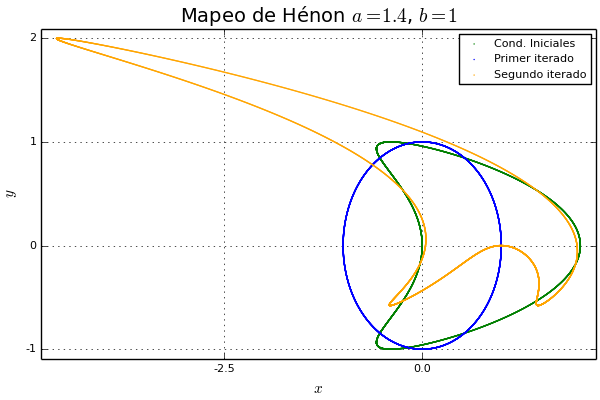

In [57]:
scatter(CI1_2[1,:], CI1_2[2,:], markersize=(1), markercolor=:green, label=("Cond. Iniciales"))
scatter!(CI1_1[1,:], CI1_1[2,:], markersize=(1), markercolor=:blue, label=("Primer iterado"))
scatter!(CI1_3[1,:], CI1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI1_4[1,:], CI1_4[2,:], markersize=(1), markercolor=:red, label=("Segundo iterado"))
xlabel!(L"x")
ylabel!(L"y")
title!(L"Mapeo de Hénon $a = 1.4$, $b=1$")

Usando la función `find_area` se calcula las áreas de los primeros tres iterados.

In [37]:
areas_b_1 = Float64[]

for i in 0:3
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, 1)
    push!(areas_b_1, a)
    
end

areas_b_1

4-element Array{Float64,1}:
 3.14137
 3.13829
 3.11968
 3.16344

| Parametrización       | Área           |
| ------------ |:-------------:| 
| Círculo      | 3.14137 | 
| 1º iterado      | 3.13829     |  
| 2º iterado | 3.11968  |  
| 3º iterado | 3.16344 |


Para obtener la anterior gráfica se usaron un millón de puntos para el método de Monte Carlo. Se observa que hasta el tercer iterado el área se mantiene cercana al valor de $\pi$. Por tanto para $b = 1$, el mapeo de Hénon es conservativo.

- ### Área para $b = -1$, $a=-1.4$.

En este se espera que mantenga constante el área del círculo conforme se vaya iterando con el mapeo de Hénon. La siguiente gráfica muestra el círculo y sus iteraciones. Si se compara con la grafica anterior con $b = 1$, se observa que la orientación de las deformaciones están invertidas.

In [54]:
t_rango = 0:0.001:2π
CI_1_1 = condiones_iniciales_2D(σ, t_rango, 1.4, -1)
CI_1_2 = iterator(Henon, CI_1_1, 1.4, -1, 1)
CI_1_3 = iterator(Henon, CI_1_2, 1.4, -1, 1)
CI_1_4 = iterator(Henon, CI_1_3, 1.4, -1, 1)

2×6284 Array{Float64,2}:
 1.32975  1.32945   1.32915   1.32884   …  1.33039   1.3301    1.32981 
 0.224    0.222879  0.221757  0.220634     0.226444  0.225327  0.224208


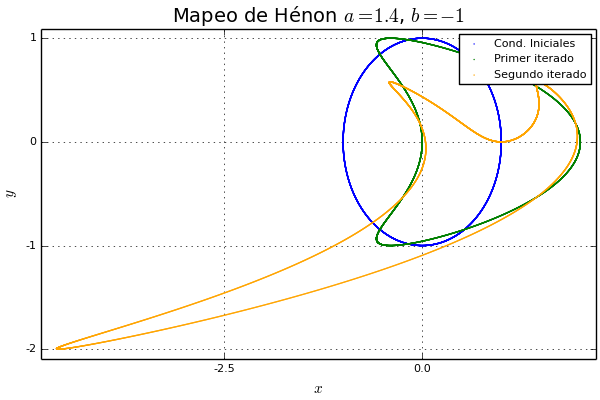

In [55]:
scatter(CI_1_1[1,:], CI_1_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI_1_2[1,:], CI_1_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI_1_3[1,:], CI_1_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI_1_4[1,:], CI_1_4[2,:], markersize=(1), markercolor=:red, label=("Tercer iterado"))
title!(L"Mapeo de Hénon $a = 1.4$, $b=-1$")
xlabel!(L"x")
ylabel!(L"y")

In [50]:
areas_b__1 = Float64[]

for i in 0:3
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, -1)
    push!(areas_b__1, a)
    
end

areas_b__1

4-element Array{Float64,1}:
 3.14094
 3.13862
 3.12373
 3.16609

| Parametrización       | Área           |
| ------------ |:-------------:| 
| Círculo      | 3.14094 | 
| 1º iterado      | 3.13862     |  
| 2º iterado | 3.12373  |  
| 3º iterado | 3.16609 |

Se usaron un millón de puntos para medir cada una de las áreas. Se puede apreciar que el area de los iterados se mantiene cercano al valor $\pi$.

- ### Área para $b = 0.3$, $a=-1.4$.

Para estas constantes se espera que el área sí se contraiga. La siguiente gráfica ya 

In [58]:
t_rango = 0:0.001:2π
CI03_1 = condiones_iniciales_2D(σ, t_rango, 1.4, 0.3)
CI03_2 = iterator(Henon, CI03_1, 1.4, 0.3, 1)
CI03_3 = iterator(Henon, CI03_2, 1.4, 0.3, 1)
CI03_4 = iterator(Henon, CI03_3, 1.4, 0.3, 1)

2×6284 Array{Float64,2}:
 -0.740886  -0.743962  -0.747041  …  -0.734175  -0.737244  -0.740317
  0.3228     0.323136   0.323472      0.322066   0.322402   0.322738


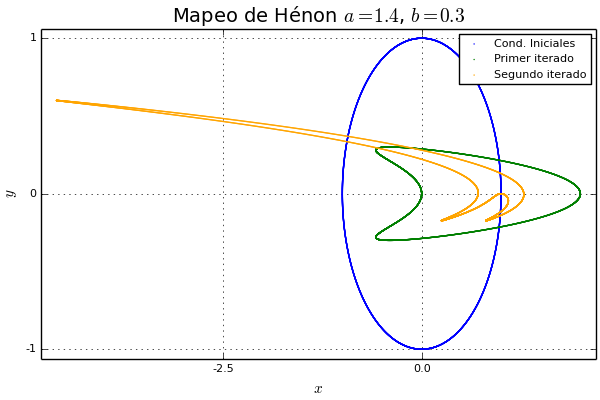

In [60]:
scatter(CI03_1[1,:], CI03_1[2,:], markersize=(1), markercolor=:blue, label=("Cond. Iniciales"))
scatter!(CI03_2[1,:], CI03_2[2,:], markersize=(1), markercolor=:green, label=("Primer iterado"))
scatter!(CI03_3[1,:], CI03_3[2,:], markersize=(1), markercolor=:orange, label=("Segundo iterado"))
#scatter!(CI03_4[1,:], CI03_4[2,:], markersize=(1), markercolor=:red, leg=false)
title!(L"Mapeo de Hénon $a = 1.4$, $b=0.3$")
xlabel!(L"x")
ylabel!(L"y")

In [49]:
areas_b_03 = Float64[]

for i in 0:3
    
    a = find_area(itera_parametrizacion_henon(i), t_rango, 1000000, 1.4, 0.3)
    push!(areas_b_03, a)
    
end

areas_b_03

4-element Array{Float64,1}:
 3.14235 
 0.944106
 0.282282
 0.088815

| Parametrización       | Área           |
| ------------ |:-------------:| 
| Círculo      | 3.14235 | 
| 1º iterado      | 0.944106    |  
| 2º iterado | 0.2822282 |  
| 3º iterado | 0.088815 |



## Mapeos en 2D
### Estabilidad de puntos fijos

Un mapeo en dos dimensiones se puede caracterizar, al igual que un mapeo en una dimensión, con la estabilidad de sus puntos fijos, sus órbitas periódicas y otras propiedades que dependen de los parámetros del mapeo. 

Sea $f(\vec{x},\alpha)$ un mapeo en dos dimensiones, con $ \vec{x}=(x,y)$  y $\alpha$ un conjunto de parámetros de los que depende el mapeo.

Los puntos fijos serán aquellos que satisfagan

$$f(\vec{x}^*,\alpha)=\vec{x}^*$$

Para mapeos lineales de la forma 

$$f(\vec{x})=A\vec{x}$$  (con A una matriz de $2\times2$) se tiene que sus puntos fijos son los que satisfacen 

$$A\vec{x}^*=\vec{x}^*$$

ó bien 

$$ (A-I)\vec{x}^*=0$$

Si $(A-I)$ es no singular, entonces $\vec{x}^*$ es el unico punto de equilibrio del sistema, pero si $(A-I)$ es singular, hay una familia de puntos de equlibrio. En tal caso se define

$$\vec{y}=\vec{x}-\vec{x}^*$$ 

y se obtiene un nuevo mapeo 

$$f_y(\vec{y})=A\vec{y}$$ 
cuyos puntos de equlibrio satisfacen

$$\vec{y}^*=A\vec{y}^*$$

Así las ropiedades de estabilidad de un punto de equilibrio $\vec{x}^*\neq 0 $son las mismas que las de un punto de equilibrio $\vec{x}=0$. Sea

$$J=P^{-1}AP$$

la forma canónica de Jordan de A. Sea también 

$$\vec{y}=P^{-1}\vec{x}$$

Entonces el sistema original se transforma a 

$$f_y(\vec{y})=J\vec{y}$$ 


Hay tre posibles formas canónicas de Jordan que se pueden tener, como vimos en clase. Estas formas son:
\begin{equation*}
\left( 
\begin{array}{cc}
\alpha & -\beta \\
\beta & \alpha 
\end{array} 
\right), 
\left( 
\begin{array}{cc}
\lambda & 1 \\
0 & \lambda 
\end{array} 
\right),
\left( 
\begin{array}{cc}
\lambda & 0 \\
0 & \mu
\end{array} 
\right),
\end{equation*}
donde $\alpha, \beta, \lambda$ y $\mu$ son reales, con $\beta\ne 0$ y $\mu\ne\lambda$. En esta forma, los elementos de la diagonal son los eigenvalores, excepto para la primer matriz, cuyos eigenvalores son $\alpha\pm i \beta$.

Para el caso general en que el mapeo $f(\vec{x},\alpha)$ no es lineal, se puede linealizar con la matriz jacbiana $J_b$ y así estudiar localmente el comportamiento alrededor de los puntos fijos del mapeo.

Por ahora estudiemos el caso en el que los eigenvalores son dos reales distintos. 

Cuando se tienen dos eigenvalores reales distintos, los puntos fijos pueden ser:

- Puntos fijos aasíntoticamente estables: $\lambda_1\lt\lambda_2\lt1$
- Puntos fijos  inestables: $\lambda_1\gt\lambda_2\gt1$
- Puntos fijos silla: $0 \lt \lambda_1 \lt 1, \lambda_2\gt1$
- Puntos fijos degenerados: $\lambda_1=1, \lambda_1 \gt \lambda_2$
- Punto fijo estable:$-1\lt\lambda_1\lt 0 \lt\lambda_2\lt1$
- Punto fijo estable: $-1\lt\lambda_1\lt\lambda_2\lt0$
- Punto fijo silla: $\lambda_1\lt -1 \lt \lambda_2 \lt 0$
- Punto fijo silla: $\lambda_1\lt -1$ y  $ 0\lt\lambda_2 \lt 1$
- Punto fijo silla: $-1\lt\lambda_1\lt 0$ y  $ 1\lt\lambda_2$

Nota: Los puntos fijos silla son inestables.

Esto lo usamos  para estudiar los puntos fijos del  **mapeo clásico de Hénon** que  está definido por 

$$ \begin{array}{cc}
x_{n+1}=& 1-ax^2_n+y_n \\
y_{n+1}= & bx_n 
\end{array} $$


La matriz jacobiana de este mapeo es:

\begin{equation*}
J_b=\left( 
\begin{array}{cc}
-2ax & 1 \\
b & 0 
\end{array} 
\right)
\end{equation*}

Sus eigenvalores están dados por 

$$\lambda_{\pm}=-ax\pm\sqrt{(ax)^2+b}$$

Estos eigenvalores son reales y diferentes simpre que se satisfaga $b\gt-(ax)^2$

Los puntos fijos del mapeo de Hénon están dados por 

$$x=\frac{(1-b)}{2a}\pm 1/2\sqrt{(1-b)^2+4a}$$

$$y=bx$$

Por lo que existen dos puntos fijos en el plano $XY$ para cuando 

$$a\gt-1/4(1-b)^2$$

y un solo punto fijo en el plano $XY$ si
$$a=-1/4(1-b)^2$$

Escribamos algunas funciones que nos permitirán estudiar la estabilidad de los puntos fijos del mapeo de Hénon.

In [1]:
"""Función que define el mapeo de Henon en 2D"""
function Henon_map(x,y,a,b)
    fx=y+1-a*x^2
    fy=b*x
    return fx,fy
end 

Henon_map

In [2]:
function Fixed_points(a,b)
    xf1=-(1-b)/(2a)+(1/2a)*sqrt((1-b)^2+4a)
    xf2=-(1-b)/(2a)-(1/2a)*sqrt((1-b)^2+4a)
    yf1=b*xf1
    yf2=b*xf2
    return (xf1,yf1),(xf2,yf2)
end 

Fixed_points (generic function with 1 method)

In [3]:
function Jacobian_henon(x,y,a,b)
    Df=[[-2a*x,b] [1,0]]
    return Df
end 

Jacobian_henon (generic function with 1 method)

In [4]:
function EigenVals_JacHen(x,y,a,b)
    λ₁=-a*x+sqrt((a*x)^2+b)
    λ₂=-a*x-sqrt((a*x)^2+b)
    return λ₁,λ₂
end 

EigenVals_JacHen (generic function with 1 method)

## Conjutos de Julia

Ya que sabemos cómo determinar la estabilidad de los puntos fijos del mapeo de Hénon, pero necesitamos estudiar las órbitas que se obtienen al iterar $N$ veces en el mapeo de Hénon una condición inicial $\vec{x}_0$. 

Tal como hicimos en la tarea 2, exploremos una región grande el el plano $XY$ para darnos una idea de cuáles son las condiciones iniciales que al iterarse convergen a alguna órbita acotada en el espacio $XY$ y cuáles otras condiciones "explotan" rápidamente después de iterar el mapeo una cantidad finita de veces.

La siguiente función es un algoritmo que construye el conjunto de Julia para una región en el espacio $XY$

In [6]:
"""Función que grafica el conjunto de Julia generado por el mapeo f(z,c), en donde z 
es la variable en el plano complejo y c el parametro que caracteriza al 
sistema dinamico z_{n+1}=f(z_n)

init_cond =  la malla de condiciones iniciales en el plano complejo 

m =  numero limite de iteraciones del mapeo

R= radio del circulo en el plano complejo que se toma como criterio de divergencia

"""
function Julia_set_Henon(a,b,xrange,yrange,maxiter,R)
    
    mx=length(xrange)
    my=length(yrange)
    iterandos=zeros(my,mx) 
    for i in 1:mx
        for j in 1:my
            x=xrange[i]
            y=yrange[my+1-j]
                for k in 1:maxiter
                x,y=Henon_map(x,y,a,b)
                iterandos[j,i]=k
                    if sqrt(x^2+y^2)>=R 
                    break
                    end 
                end
        end 
    end
    return iterandos
end

Julia_set_Henon

# Caso conservativo 

En este caso $b=-1$ y $b=1$. Para que existan puntos fijos reales se debe cumplir $a>a_{0}=-\frac{1}{4}(1-b)^{2}$.

Para $b=-1$, $a=1.4$ se tiene lo siguiente:

In [7]:
a=1.4
b=-1
xf1,xf2=Fixed_points(a,b)

((0.39228095605926205,-0.39228095605926205),(-1.8208523846306908,1.8208523846306908))

In [8]:
Jac1=Jacobian_henon(xf1[1],xf1[2],a,b)
Jac2=Jacobian_henon(xf2[1],xf2[2],a,b);

In [9]:
λ1,λ2=eigvals(Jac1)

2-element Array{Complex{Float64},1}:
 -0.549193+0.835695im
 -0.549193-0.835695im

In [10]:
λ3,λ4=eigvals(Jac2)

2-element Array{Float64,1}:
 4.89406 
 0.204329

Aquí el primer punto fijo $\vec{x_1^*}=(0.3922...,-0.3922...)$ nos da una matriz Jacobiana cuyos valores propios son complejos. Notemos que la norma de estos valores propios es 

In [11]:
abs(λ1)

1.0

Este caso corresponde a puntos fijos que se denominan **centros estables**, y dan lugar a órbitas periódicas cerradas en el espacio fase como mostraremos más adelante. 

El segundo punto fijo correspondiente a $\vec{x_2^*}=(-1.82085...,1.82085...)$ coresponde a un punto silla inestable ya que ambos eigenvalores son reales y satisfacen un de los criterios arriba mencionados.

Por tanto el punto fijo en el caso **conservativo**, el punto fijo

$$\vec{x}_1^*=(0.84515...,0.84515...)$$ 

también corresponde  a un punto silla (inestable).


In [12]:
λ1,λ2=EigenVals_JacHen(xf2[1],xf2[2],a,b)

(4.894057231540714,0.2043294454252198)

Por tanto el punto fijo en el caso **conservativo**, el punto fijo

$$\vec{x}_2^*=(-0.84515...,-0.84515...)$$ 

también corresponde  a un punto silla (inestable).


Este tipo de análisis realizado para los conjuntos de parámetros $a=1.4,b=0.3,-1$ se puede realizar para cuales quiera dos pares de parámetros (a,b) siempre y cuando se satisfaga la condición de que existan puntos fijos en el plano complejo. Esta condición como se menciono anteriormente es que hay dos puntos fijos en el plano $XY$ para cuando 

$$a\gt-1/4(1-b)^2$$

y un solo punto fijo en el plano $XY$ si
$$a=-1/4(1-b)^2$$. 


- A continuación se presenta el conjunto de Julia para $b=1.0$ y se varía $a$ de $-1$ a $3$.

![](JS_b_p1.gif)

Se puede observar que para que existan puntos fijos reales se debe cumplir $a>0$

- A continuación se presenta el conjunto de Julia para $b=-1.0$ y se varía $a$ de $-2$ a $4$.

![](JS_b_m1.gif)

Se puede observar que para que existan puntos fijos reales se debe cumplir $a>-1$

# Caso disipativo

En este caso $b\neq|1|$. Se escogen los parámetros $a=1.4,b=0.3$

In [13]:
a=1.4
b=0.3
xf1,xf2=Fixed_points(a,b);

In [14]:
xf1

(0.6313544770895047,0.1894063431268514)

In [15]:
xf2

(-1.1313544770895048,-0.3394063431268514)

In [16]:
λ1,λ2=EigenVals_JacHen(xf1[1],xf1[2],a,b)

(0.15594632230279393,-1.9237388581534067)

Por tanto vemos que el punto fijo 

$$\vec{x^*_1}=(0.63135...,0.18940...)$$ 

es un punto fijo silla, que son puntos inestables.

Para el segundo punto fijo se tiene que los eigenvalores estan dados por:

In [17]:
λ3,λ4=EigenVals_JacHen(xf2[1],xf2[2],a,b)

(3.259822097891452,-0.09202956204083912)

Por tanto vemos que eel segundo punto fijo correspondiente a 

$$\vec{x^*_2}=(-1.13135...,-0.33940...)$$

también corresponde a un punto fijo silla (inestable).

A continuación se presenta el conjunto de Julia para $b=0.3$ y se varía $a$ de $-0.4$ a $3$.

![](JS_b_03.gif)